In [9]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load dataset 'census_cleaned.csv'
df_census = pd.read_csv('census_cleaned.csv')

# Split data into X and y
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [11]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Initialize classification model
clf = DecisionTreeClassifier(random_state=2)

# Fit model on training data
clf.fit(X_train, y_train)

# Make predictions for test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy_score(y_pred, y_test)

0.8131679154894976

In [12]:
# Download bike_rentals_cleaned dataset
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

# Split data into X and y
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [13]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Import cross_val_score
from sklearn.model_selection import cross_val_score

In [14]:
# Initialize Decision Tree Regressor
reg = DecisionTreeRegressor(random_state=2)

# Obtain scores of cross-validation using mean squared error
scores = cross_val_score(reg, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=5)

# Take square root of the scores
rmse = np.sqrt(-scores)

# Display mean score
print('RMSE mean: %0.2f' % (rmse.mean()))

RMSE mean: 1233.36


In [15]:
# Initialize and score DecisionTreeRegressor on training set
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
from sklearn.metrics import mean_squared_error
reg_mse = mean_squared_error(y_train, y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

0.0

In [16]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Choose max_depth hyperparameters
params = {'max_depth':[None,2,3,4,6,8,10,20]}

# Initialize regression model as reg
reg = DecisionTreeRegressor(random_state=2)

# Initialize GridSearchCV as grid_reg
grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit grid_reg on X_train and y_train
grid_reg.fit(X_train, y_train)

# Extract best parameters
best_params = grid_reg.best_params_

# Print best hyperparameters
print("Best params:", best_params)

Best params: {'max_depth': 6}


In [17]:
# Compute best score
best_score = np.sqrt(-grid_reg.best_score_)

# Print best score
print("Training score: {:.3f}".format(best_score))

Training score: 951.398


In [18]:
# Extract best model
best_model = grid_reg.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error

# Compute rmse_test
rmse_test = mean_squared_error(y_test, y_pred)**0.5

# Print rmse_test
print('Test score: {:.3f}'.format(rmse_test))

Test score: 864.670


In [19]:
# Create grid_search function
def grid_search(params, reg=DecisionTreeRegressor(random_state=2)):

    # Instantiate GridSearchCV as grid_reg
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    
    # Fit grid_reg on X_train and y_train
    grid_reg.fit(X_train, y_train)

    # Extract best params
    best_params = grid_reg.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = np.sqrt(-grid_reg.best_score_)

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = grid_reg.predict(X_test)

    # Compute rmse_test
    rmse_test = mean_squared_error(y_test, y_pred)**0.5

    # Print rmse_test
    print('Test score: {:.3f}'.format(rmse_test))

In [20]:
X_train.shape

(548, 12)

In [21]:
grid_search(params={'min_samples_leaf':[1,2,4,6,8,10,20,30]})

Best params: {'min_samples_leaf': 8}
Training score: 896.083
Test score: 855.620


In [22]:
grid_search(params={'max_depth':[None,2,3,4,6,8,10,20],'min_samples_leaf':[1,2,4,6,8,10,20,30]})

Best params: {'max_depth': 6, 'min_samples_leaf': 2}
Training score: 870.396
Test score: 913.000


In [23]:
grid_search(params={'max_depth':[5,6,7,8,9],'min_samples_leaf':[3,5,7,9]})

Best params: {'max_depth': 9, 'min_samples_leaf': 7}
Training score: 888.905
Test score: 878.538


# Case Study - Heart Disease

In [24]:
# Upload heart.csv to dataFrame
df_heart = pd.read_csv('heart_disease.csv')

# Show first five rows
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# split data into X and y
X = df_heart.iloc[:,:-1]
y = df_heart.iloc[:,-1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [26]:
# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=2)

# Obtain scores of cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Display accuracy
print('Accuracy:', np.round(scores, 2))

# Display mean accuracy
print('Accuracy mean: %0.2f' % (scores.mean()))

Accuracy: [0.74 0.85 0.77 0.73 0.7 ]
Accuracy mean: 0.76


In [27]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_clf(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):

    # Instantiate GridSearchCV as grid_reg
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, 
                                  cv=5, n_jobs=-1, random_state=2)
    
    # Fit grid_reg on X_train and y_train
    rand_clf.fit(X_train, y_train)

    # Extract best estimator
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
        
    # Return best model
    return best_model

In [28]:
randomized_search_clf(params={'criterion':['entropy', 'gini'],
                            'splitter':['random', 'best'],
                            'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                            'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                            'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                            'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                            'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                            'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                            'max_depth':[None, 2,4,6,8],
                            'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                            })

Training score: 0.798
Test score: 0.855


DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

In [29]:
randomized_search_clf(params={'max_depth':[None, 6, 7],
                                'max_features':['auto', 0.78],
                                'max_leaf_nodes':[45, None],
                                'min_samples_leaf':[1, 0.035, 0.04, 0.045, 0.05],
                                'min_samples_split':[2, 9, 10],
                                'min_weight_fraction_leaf': [0.0, 0.05, 0.06, 0.07],
                                },
                                runs=100)

Training score: 0.802
Test score: 0.868


DecisionTreeClassifier(max_depth=7, max_features=0.78, max_leaf_nodes=45,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, random_state=2)

In [30]:
# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(class_weight=None, 
                                criterion='gini', 
                                max_depth=7,
                                max_features=0.78, 
                                max_leaf_nodes=45,
                                min_impurity_decrease=0.0, 
                                # min_impurity_split=None,
                                min_samples_leaf=0.045, 
                                min_samples_split=9,
                                min_weight_fraction_leaf=0.06, 
                                # presort=False, 
                                random_state=2,
                                splitter='best')

# Obtain scores of cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Display accuracy
print('Accuracy:', np.round(scores, 2))

# Display mean accuracy
print('Accuracy mean: %0.2f' % (scores.mean()))

Accuracy: [0.82 0.9  0.8  0.8  0.78]
Accuracy mean: 0.82


In [31]:
best_clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=0.78, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, 
                    #    min_impurity_split=None,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, 
                    #    presort=False,
                       random_state=2, splitter='best')
best_clf.fit(X, y)

DecisionTreeClassifier(max_depth=7, max_features=0.78, max_leaf_nodes=45,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, random_state=2)

Train dataset:
ROC = 0.91
Accuracy: 0.81
         fpr    tpr
0   0.000000  0.000
1   0.000000  0.336
2   0.019608  0.464
3   0.068627  0.656
4   0.156863  0.816
5   0.254902  0.864
6   0.323529  0.928
7   0.441176  0.960
8   0.588235  0.992
9   0.774510  1.000
10  1.000000  1.000


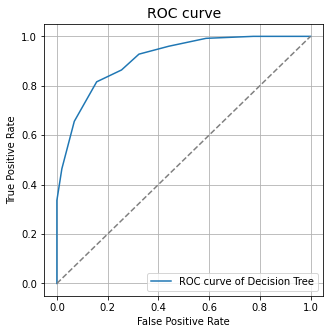

Test dataset:
ROC = 0.96
Accuracy: 0.92
         fpr    tpr
0   0.000000  0.000
1   0.000000  0.375
2   0.000000  0.475
3   0.027778  0.675
4   0.111111  0.825
5   0.138889  0.975
6   0.277778  0.975
7   0.361111  0.975
8   0.555556  1.000
9   0.722222  1.000
10  1.000000  1.000


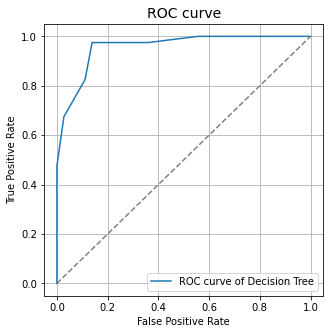

In [32]:
#omd
# ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

X_ds = [X_train, X_test]
Y_ds = [y_train, y_test]
titles = ['Train dataset', 'Test dataset']

for i in range(2):
    print('{}:'.format(titles[i]))
    roc = roc_auc_score(Y_ds[i], best_clf.predict_proba(X_ds[i])[:, 1])
    print('ROC = {0:0.2f}'.format(roc))

    predictions = [0 if i < 0.5 else 1 for i in best_clf.predict_proba(X_ds[i])[:, 1]]
    acc = accuracy_score(Y_ds[i].values, predictions)
    print('Accuracy: {0:0.2f}'.format(acc))

    y_pred_proba = best_clf.predict_proba(X_ds[i])[:,1]
    fpr, tpr, _ = metrics.roc_curve(Y_ds[i],  y_pred_proba)
    df = pd.DataFrame({'fpr':fpr, 'tpr':tpr})
    print(df)

    #create ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr,tpr, label='ROC curve of Decision Tree')
    plt.plot([0, 1], [0, 1], color='grey', ls='--')
    plt.title('ROC curve', size=14)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid(True)
    plt.legend()
    plt.show()

Accuracy: [0.82 0.9  0.8  0.8  0.78]
Accuracy mean: 0.82
ROC: [0.86 0.93 0.86 0.88 0.79]
ROC mean: 0.86
Target variable:
1    165
0    138
Name: target, dtype: int64


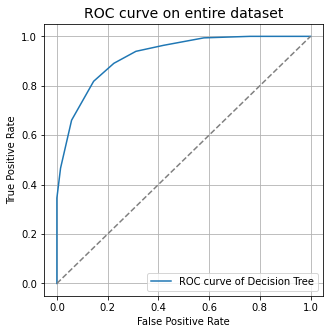

[Text(0.5131578947368421, 0.9, 'X[2] <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(0.2631578947368421, 0.7, 'X[11] <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.15789473684210525, 0.5, 'X[12] <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.10526315789473684, 0.3, 'X[0] <= 53.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.05263157894736842, 0.1, 'gini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.15789473684210525, 0.1, 'gini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Text(0.21052631578947367, 0.3, 'gini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.3684210526315789, 0.5, 'X[3] <= 131.0\ngini = 0.12\nsamples = 78\nvalue = [73, 5]'),
 Text(0.3157894736842105, 0.3, 'X[9] <= 1.1\ngini = 0.198\nsamples = 45\nvalue = [40, 5]'),
 Text(0.2631578947368421, 0.1, 'gini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.3684210526315789, 0.1, 'gini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(0.42105263157894735, 0.3, 'gin

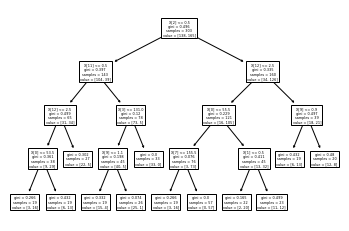

In [33]:
# omd
model = DecisionTreeClassifier(class_weight=None,
                                criterion='gini', 
                                max_depth=7, 
                                max_features=0.78, 
                                max_leaf_nodes=45, 
                                min_impurity_decrease=0.0, 
                                # min_impurity_split=None, 
                                min_samples_leaf=0.045, 
                                min_samples_split=9,
                                min_weight_fraction_leaf=0.06, 
                                # presort=False, 
                                random_state=2,
                                splitter='best')

accu_scores = cross_val_score(model, X, y, cv=5)
roc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print('Accuracy:', np.round(accu_scores, 2))
print('Accuracy mean: %0.2f' % (scores.mean()))
print('ROC: {}'.format(np.round(roc_scores, 2)))
print('ROC mean: {0:0.2f}'.format(roc_scores.mean()))
print('Target variable:')
print(y.value_counts())

model.fit(X, y)
y_pred_proba = model.predict_proba(X)[:,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)

#create ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr,tpr, label='ROC curve of Decision Tree')
plt.plot([0, 1], [0, 1], color='grey', ls='--')
plt.title('ROC curve on entire dataset', size=14)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

# plot the tree
import sklearn.tree as tree
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("heart") 
tree.plot_tree(model)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))# set plot size (denoted in inches)
tree.plot_tree(,fontsize=10)

In [38]:
model.classes_

array([0, 1])

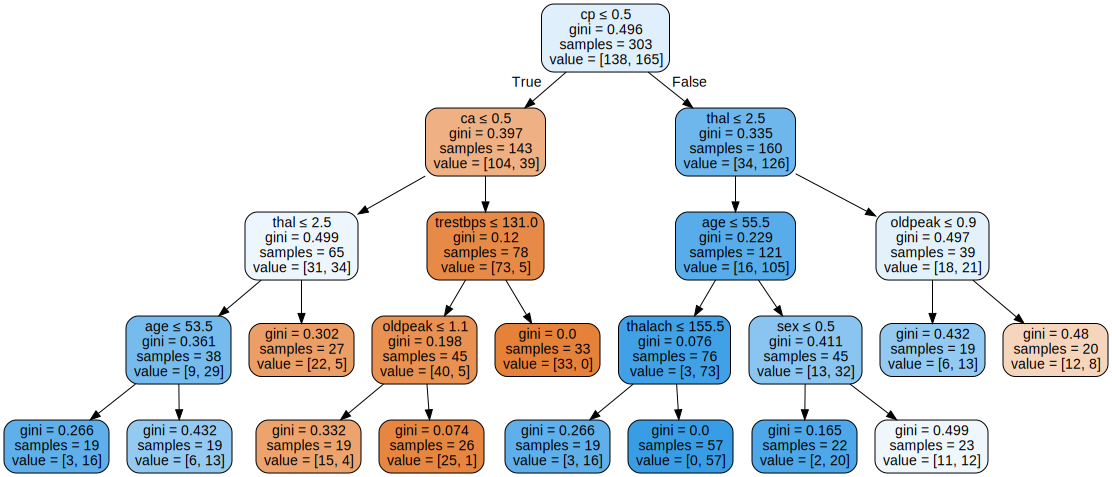

In [41]:
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=model.feature_names_in_,  
                                # class_names=,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [25]:
best_clf.feature_importances_

array([0.04826754, 0.04081653, 0.48409586, 0.00568635, 0.        ,
       0.        , 0.        , 0.00859483, 0.        , 0.02690379,
       0.        , 0.18069065, 0.20494446])

In [26]:
# Zip columns and feature_importances_ into dict
feature_dict = dict(zip(X.columns, best_clf.feature_importances_))

# Import operator
import operator

# Sort dict by values (as list of tuples)
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)[0:3]

[('cp', 0.4840958610240171),
 ('thal', 0.20494445570568706),
 ('ca', 0.18069065321397942)]